#Lecture 5 - SVN and kNN


## 1. Introduction
In this notebook, we will explore four different classifiers and how they perform on artificial datasets with linear and nonlinear class distributions. We are most interested in how the decision boundaries change between various classifiers. <i>Note that this Notebook is based on https://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html</i>

The classifiers we will be looking at are:
- Logistic regression
- Decision tree
- linear SVM
- SVM with a nonlinear kernel
- K-Nearest-Neighbour <i>(yes, neighbour has a 'u'...)</i>

Scikit-learn has a powerful toolboxes for building classifiers, creating artificial data, and visualizing decision boundaries. The toolboxes can be seen in the import calls below.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb

We import these packages, but as usual we will also need numpy and matplotlib. Let's import those packages now.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 2. The Data

The first step in building a classifier should always be to look at your data.  It is by looking at our data that we can get a sense of the of the classification problem that we are trying to solve. 

As an analogy, a landscaper has various tools that they can use for moving dirt; these range from trowels to shovels to backhoes to excavators. With no specific problem in mind, we might say that the excavator is the best tool for moving dirt, beacuse it can most the largest volume in the shortest amount of time. If we were show up to a job with our excavator ready to go, but the job was to plant tulips, we would probably wish we would have brought a trowel.

Bringing this back to machine learning, if we neglect to get a sense of how our data is distributed, we might reach for the most computationally expensive, complex classifier as a catch-all, and find ourselves planting tulips with excavators.


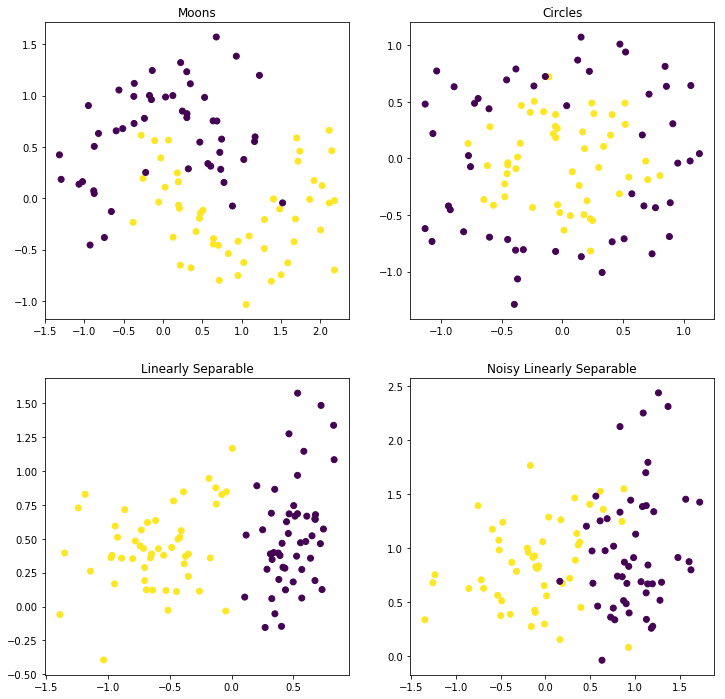

In [0]:
# Create 4 datasets of varying difficulty:

# 1) Make a dataset with classes that have either concave-up or concave-down distributions
moons= make_moons(noise=0.3, random_state=0)

# 2) Dataset where classes are distributed in concentric circles
circles= make_circles(noise=0.2, factor=0.5, random_state=1)

# 3) Create two rougly-linearly-separable classes (y) with feature vectors (X) 
#    that are normally distributed about two seed points
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.5)
linearly_separable = (X, y)

# 4) Add uniformly distributed noise to the linearly separable data
rng = np.random.RandomState(2) # Initialize random number generator
Xn = X + 1 * rng.uniform(size=X.shape)  # Add noise to the feature X
noisy_linearly_separable = (Xn, y)


# Gather all four datasets
datasets = [moons,
            circles,
            linearly_separable,
            noisy_linearly_separable]

dataset_names= ["Moons", "Circles", "Linearly Separable", "Noisy Linearly Separable"]

x1= moons[0] # index of array containing feature vectors
y1= moons[1] # index of array containing class labels
x2= circles[0]
y2= circles[1]
x3= linearly_separable[0]
y3= linearly_separable[1]
x4= noisy_linearly_separable[0]
y4= noisy_linearly_separable[1]


## Visualize the datasets

#Plot moons data
plt.figure(figsize= (12,12))
plt.subplot(2, 2, 1)
plt.scatter(x1[0:,0], x1[0:,1], c=y1)
plt.title(dataset_names[0])

#Plot Circles data
plt.subplot(2, 2, 2)
plt.scatter(x2[0:,0], x2[0:,1], c=y2)
plt.title(dataset_names[1])

#Plot Linearly separable
plt.subplot(2, 2, 3)
plt.scatter(x3[0:,0], x3[0:,1], c=y3)
plt.title(dataset_names[2])

#Plot Linearly separable
plt.subplot(2, 2, 4)
plt.scatter(x4[0:,0], x4[0:,1], c=y4)
plt.title(dataset_names[3]);  #(adding semi-colon suppresses output of text "Noisy Linearly Separable")

We've had a look at the data, now let's prepare our classifiers so that we can later evaluate how they perform on each dataset.

In [0]:
classifierNames = ["Logistic Regression", "Decision Tree", "Linear SVM", "RBF SVM","KNN"]

classifiers = [
    LogisticRegression(solver='lbfgs'), #Logistic regression
    DecisionTreeClassifier(max_depth=5), #Decision tree classifier with max_depth=5
    SVC(kernel="linear", C=0.025), #Linear SVM classifier
    SVC(kernel= 'rbf', gamma=2, C=1.0), # SVM with radial basis function kernel, gamma is kernel coefficient, C is penalty parameter for misclassified points
    KNeighborsClassifier(3)]

## 3. Classifier Performance

In this section, we will visualize the decision boundary for each classifier and compute the accuracy for each classifier on each dataset. We will follow the same training and testing protocol as in the CarsRegression notebook. 

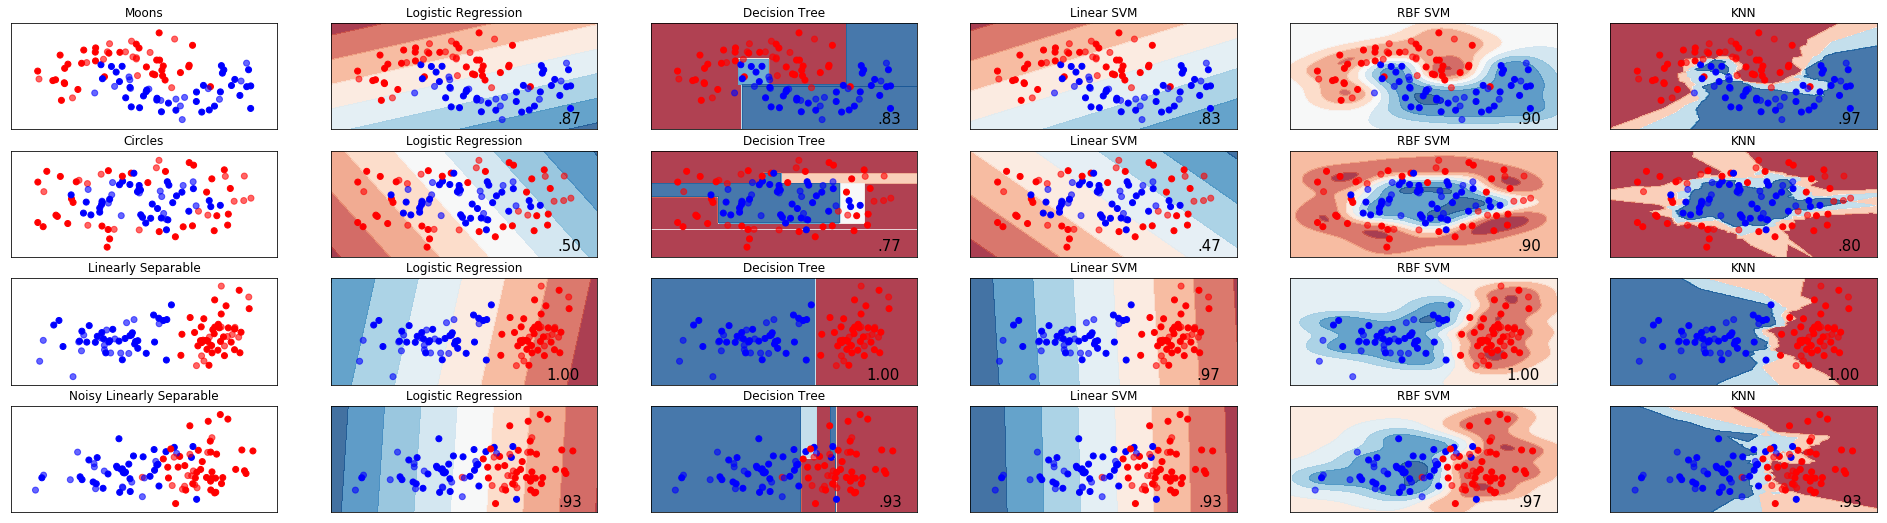

In [0]:
h = .02  # Resolution in colored mesh visualizations
i= 1
figure = plt.figure(figsize=(27, 9))
j= 0


for ds in datasets:
    
    # Preprocess dataset, split into training and test part
    X, y = ds # X is feature vectors, y is class labels
    X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # handy function
    
    # Set plot axis limits
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Prepare some nice visualizations
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the datasets in first column
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i, title=dataset_names[j])
    j+= 1
    # Plot the training points 
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # Iterate over classifiers
    for name, clf in zip(classifierNames, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # Train and test our classifier
        clf.fit(X_train, y_train) # create classification model using training data
        score = clf.score(X_test, y_test) # evaluate classifier on the testing set

        # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            # flatten xx and yy to 1D arrays and get decision function, or decision boundary hyperplane
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
        else:
            # if no decision function available, use prediction probability as contrast for contour lines
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # Plot the testing points (use alpha=0.6 to make them slightly transparent)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        # Set axes limits
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

code modified from: https://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html

## 4. Discussion

What do you notice about how each classifier's performance on each the datasets? For each dataset, which classifier would you choose to use and why?